**Packages**

**Settings**

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from IPython.display import display

# Airline Data Importing

**Import**

In [24]:


input_file_path = '../data/US Airline Flight Routes and Fares 1993-2024.csv'
cleaned_file_path = '../data/cleaned_US_Airline_Flight_Routes_and_Fares_1993_2024.csv'

df_flight = pd.read_csv(input_file_path,
                        quotechar='"',         # Specify the quote character
                        quoting=1,             # QUOTE_MINIMAL - Only quote fields with special characters
                        doublequote=True,      # Handle double quotes in quoted fields
                        escapechar=None,       # No additional escape character needed
                        on_bad_lines='warn'    # Warn about bad lines instead of raising an error
                       )

# Drop rows that are all NaN
df_flight = df_flight.dropna(how='all')

# Display the first few rows of the DataFrame
display(df_flight.head())

# Display basic information about the DataFrame
print(df_flight.info())

C:\Users\n.orie\AppData\Local\Temp\ipykernel_40912\3200663593.py:4: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flight = pd.read_csv(input_file_path,


,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [25]:
# Summary of missing data
missing_data_summary = pd.DataFrame({
    'Total Missing': df_flight.isnull().sum(),
    'Percentage Missing': df_flight.isnull().mean() * 100
})

# Display the summary
print(missing_data_summary)

                Total Missing  Percentage Missing
tbl                         0            0.000000
Year                        0            0.000000
quarter                     0            0.000000
citymarketid_1              0            0.000000
citymarketid_2              0            0.000000
city1                       0            0.000000
city2                       0            0.000000
airportid_1                 0            0.000000
airportid_2                 0            0.000000
airport_1                   0            0.000000
airport_2                   0            0.000000
nsmiles                     0            0.000000
passengers                  0            0.000000
fare                        0            0.000000
carrier_lg               1540            0.626131
large_ms                 1540            0.626131
fare_lg                  1540            0.626131
carrier_low              1612            0.655404
lf_ms                    1612            0.655404


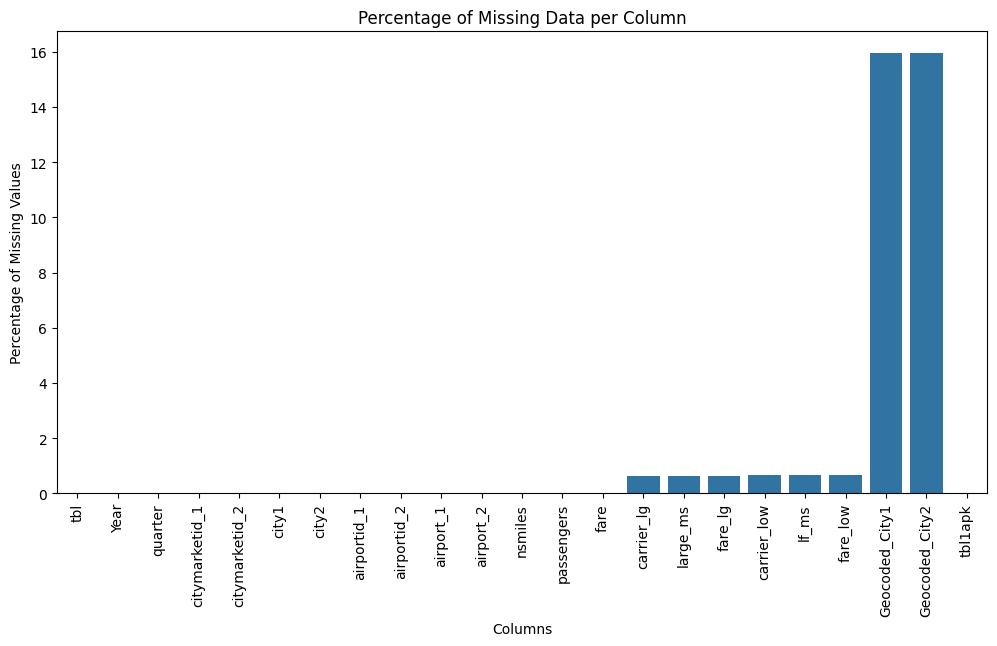

In [26]:
# Plot missing data percentage
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data_summary.index, y='Percentage Missing', data=missing_data_summary)
plt.title('Percentage of Missing Data per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.show()

**Clean flight data**

In [27]:
# rewrite Year and quarter to integer
df_flight['Year'] = df_flight['Year'].astype(int)

df_flight['quarter'] = df_flight['quarter'].astype(int)

In [28]:
# get relevant columns

df_flight = df_flight[['Year', 'quarter', 'nsmiles', 'passengers']]

In [29]:
# Calculate total passenger milage per flight (number of passengers x nsmiles)
df_flight["total passenger milage"] = df_flight['nsmiles'] * df_flight['passengers']

In [30]:
# Identify rows where Year equals quarter
equal_year_quarter = df_flight[df_flight['Year'] == df_flight['quarter']]

# Sum the rest of the rows where Year does not equal quarter
other_rows_sum = df_flight[df_flight['Year'] != df_flight['quarter']].groupby(['Year', 'quarter'], as_index=False).sum()

# Combine both DataFrames
df_flight_combined = pd.concat([equal_year_quarter, other_rows_sum])

# Sort by Year and quarter if needed
df_flight_combined = df_flight_combined.sort_values(by=['Year', 'quarter']).reset_index(drop=True)

# Display the result
df_flight_combined

,Year,quarter,nsmiles,passengers,total passenger milage
0,1993,1,2789370,345741,346688551
1,1993,2,2830350,403857,414973985
2,1993,3,2835998,393045,403191932
3,1993,4,2800236,395495,395165688
4,1994,1,2809469,397667,396583899
...,...,...,...,...,...
113,2023,1,2304008,729969,832068342
114,2023,2,2268042,853154,968647935
115,2023,3,2323143,803531,920333180
116,2023,4,2303913,815421,926607407


# Kerosine Data Importing

**import Kerosine data**

In [31]:
# File paths
input_file_path = '../data/U.S._Kerosene_Wholesale_per_Resale_Price_by_Refiners.csv'

# Step 1: Read the cleaned file into a DataFrame
df_kero = pd.read_csv(input_file_path, delimiter=',', on_bad_lines='skip', skipinitialspace=True)

# Display the first few rows of the DataFrame
display(df_kero)

# Display basic information about the DataFrame
print(df_kero.info())

,Date,Price
0,Mar 2022,3.612
1,Feb 2022,2.916
2,Jan 2022,2.655
3,Dec 2021,2.272
4,Nov 2021,2.405
...,...,...
466,May 1983,0.877
467,Apr 1983,0.842
468,Mar 1983,0.831
469,Feb 1983,0.900


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    471 non-null    object 
 1   Price   468 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.5+ KB
None


**Clean Kero Data**

In [32]:
# Check for NaN values and raise an error if any are found
# drop nan values if exceeding 5 %

if df_kero.isna().any().any():
    print("Rows that contain nan values")
    display(df_kero[df_kero.isna().any(axis=1)])
    if len(df_kero[df_kero.isna().any(axis=1)])/len(df_kero)>0.05:
        raise ValueError("DataFrame contains > 5% NaN values. Please handle missing data before proceeding.")
    else: 
        print("DataFrame contains < 5% NaN values. Please handle missing data before proceeding.")
        df_kero = df_kero.dropna()
else:
    print("No NaN values found in the DataFrame.")

print("")

print("final dataframe")
df_kero

Rows that contain nan values


,Date,Price
130,May 2011,NaN
136,Nov 2010,NaN
190,May 2006,NaN


DataFrame contains < 5% NaN values. Please handle missing data before proceeding.

final dataframe


,Date,Price
0,Mar 2022,3.612
1,Feb 2022,2.916
2,Jan 2022,2.655
3,Dec 2021,2.272
4,Nov 2021,2.405
...,...,...
466,May 1983,0.877
467,Apr 1983,0.842
468,Mar 1983,0.831
469,Feb 1983,0.900


# Exploratory Data Analysis

Make the dates match by rewriting the monthly price data to an average of that quarter

In [33]:
# Convert 'date' column to datetime format (assuming the format is "Month Year")
df_kero['Date'] = pd.to_datetime(df_kero['Date'], format='%b %Y')

# Extract Year and Month from the 'date' column
df_kero['Year'] = df_kero['Date'].dt.year
df_kero['Month'] = df_kero['Date'].dt.month

# Determine the Quarter from the Month
df_kero['quarter'] = ((df_kero['Month'] - 1) // 3) + 1

# Drop the 'Month' column as it's no longer needed
df_kero = df_kero.drop(columns=['Month'])

# Group by 'Year' and 'Quarter' and calculate the average price
df_kero_quarterly = df_kero.groupby(['Year', 'quarter'], as_index=False).agg({'Price': 'mean'})

# Display the resulting DataFrame
display(df_kero_quarterly)

,Year,quarter,Price
0,1983,1,0.891000
1,1983,2,0.855000
2,1983,3,0.879333
3,1983,4,0.899333
4,1984,1,0.959333
...,...,...,...
152,2021,1,1.827000
153,2021,2,1.841000
154,2021,3,1.982667
155,2021,4,2.370333


Show the Price over Time

C:\Users\n.orie\AppData\Local\Temp\ipykernel_40912\4204946879.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_kero_quarterly['Date'] = pd.to_datetime(df_kero_quarterly['Year'].astype(str) + 'Q' + df_kero_quarterly['quarter'].astype(str))


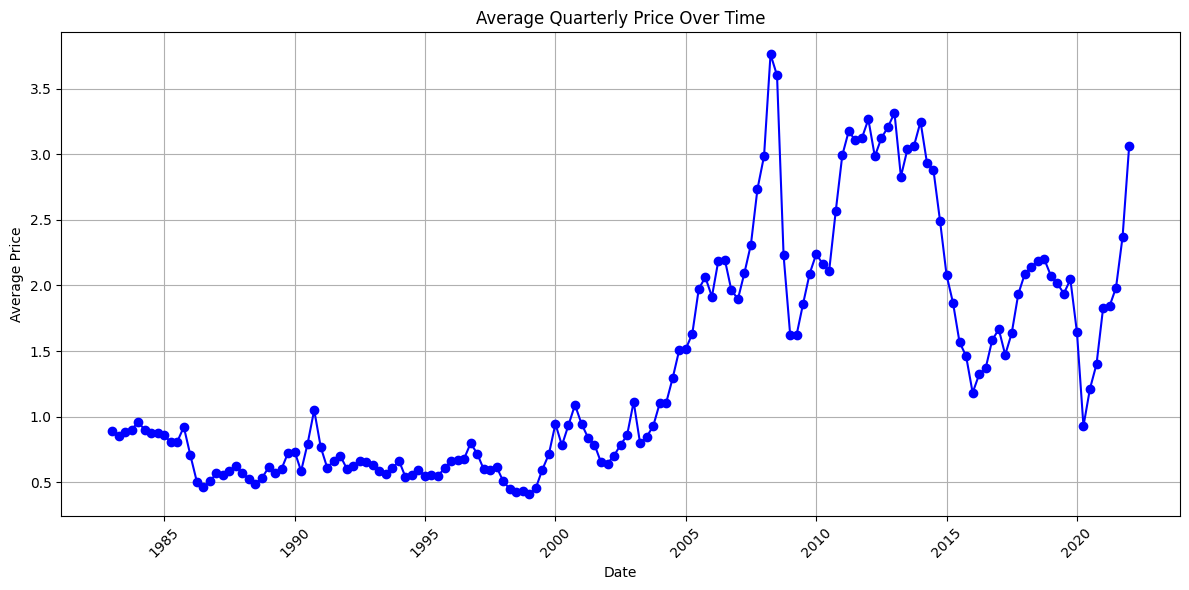

In [34]:
# Create a Period column and convert it to datetime
df_kero_quarterly['Date'] = pd.to_datetime(df_kero_quarterly['Year'].astype(str) + 'Q' + df_kero_quarterly['quarter'].astype(str))

# Plot the average price over time
plt.figure(figsize=(12, 6))
plt.plot(df_kero_quarterly['Date'], df_kero_quarterly['Price'], marker='o', linestyle='-', color='b')
plt.title('Average Quarterly Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

**Detrend data**

Detrend the data to compensate for inflation effects by substracting the rolling average from the data

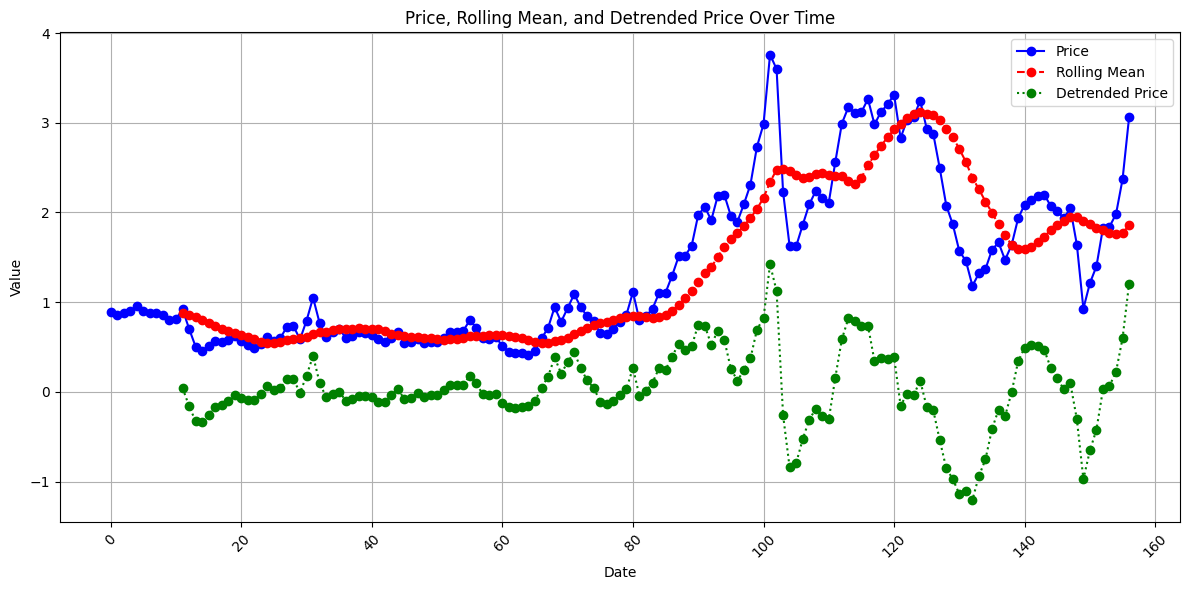

In [35]:
# Calculate the rolling mean (trend)
rolling_mean = df_kero_quarterly['Price'].rolling(window=12, center=False).mean()

# Detrend the series by subtracting the rolling mean
df_kero_quarterly['Detrended_Price'] = df_kero_quarterly['Price'] - rolling_mean

# Plot the Price, Rolling Mean, and Detrended Price
plt.figure(figsize=(12, 6))

# Plot the original Price
plt.plot(df_kero_quarterly.index, df_kero_quarterly['Price'], marker='o', linestyle='-', color='b', label='Price')

# Plot the Rolling Mean
plt.plot(df_kero_quarterly.index, rolling_mean, marker='o', linestyle='--', color='r', label='Rolling Mean')

# Plot the Detrended Price
plt.plot(df_kero_quarterly.index, df_kero_quarterly['Detrended_Price'], marker='o', linestyle=':', color='g', label='Detrended Price')

# Add labels and title
plt.title('Price, Rolling Mean, and Detrended Price Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


**Flight Data**

Show flight information over time

In [ ]:
df_flight_combined

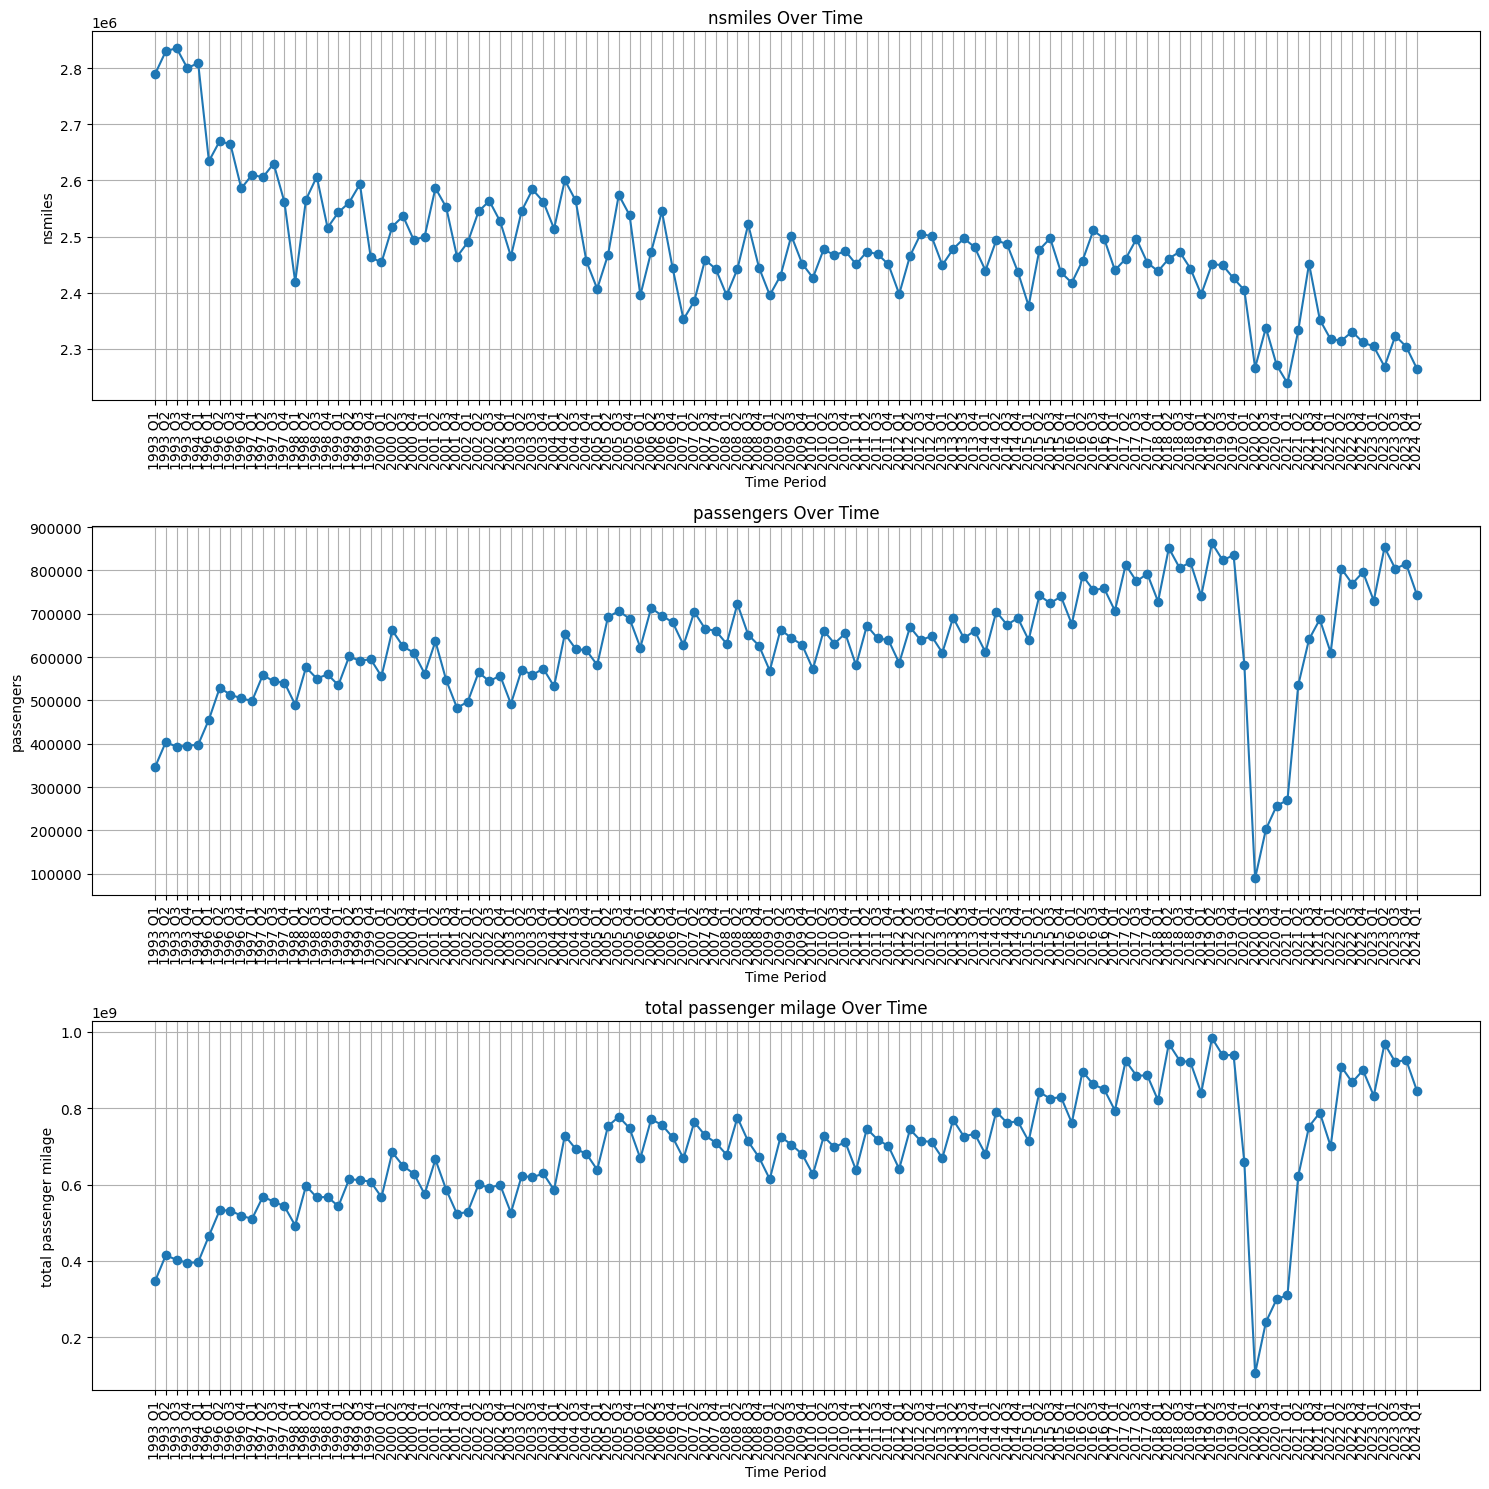

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_flight_combined is your DataFrame

# Combine 'Year' and 'Quarter' into a single time period column
df_flight_combined['TimePeriod'] = df_flight_combined['Year'].astype(str) + ' Q' + df_flight_combined['quarter'].astype(str)

# Set 'TimePeriod' as a categorical type with proper order
df_flight_combined['TimePeriod'] = pd.Categorical(df_flight_combined['TimePeriod'], 
                                                   categories=sorted(df_flight_combined['TimePeriod'].unique()), 
                                                   ordered=True)

# Get the list of other columns (excluding 'Year', 'Quarter', and 'TimePeriod')
other_columns = df_flight_combined.columns.difference(['Year', 'quarter', 'TimePeriod'])

# Plot each of the other columns over time
plt.figure(figsize=(15, len(other_columns) * 5))

for index, col in enumerate(other_columns):
    plt.subplot(len(other_columns), 1, index + 1)
    plt.plot(df_flight_combined['TimePeriod'], df_flight_combined[col], marker='o')
    plt.title(f'{col} Over Time')
    plt.xlabel('Time Period')
    plt.ylabel(col)
    plt.grid(True)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

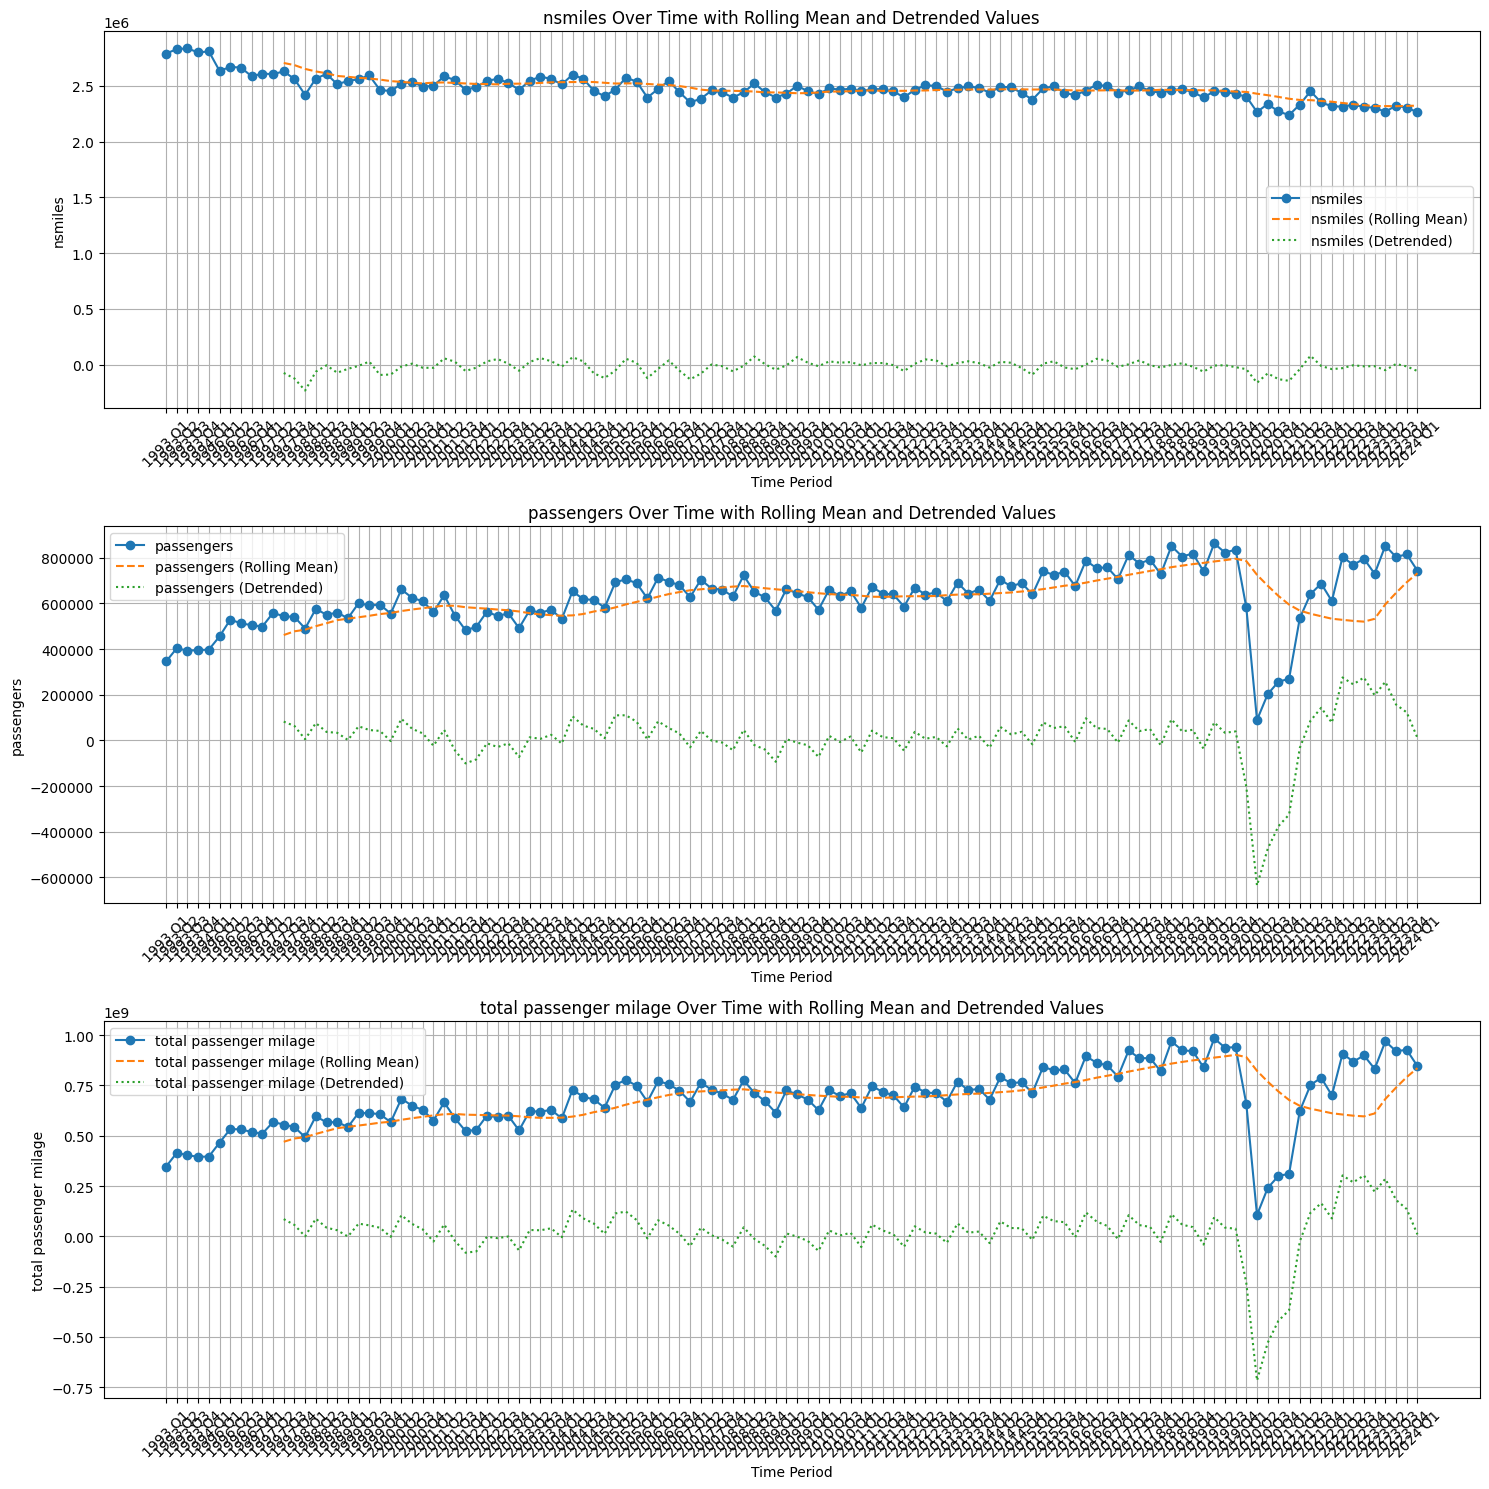

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_flight_combined is your DataFrame

# Combine 'Year' and 'Quarter' into a single time period column
df_flight_combined['TimePeriod'] = df_flight_combined['Year'].astype(str) + ' Q' + df_flight_combined['quarter'].astype(str)

# Set 'TimePeriod' as a categorical type with proper order
df_flight_combined['TimePeriod'] = pd.Categorical(df_flight_combined['TimePeriod'], 
                                                   categories=sorted(df_flight_combined['TimePeriod'].unique()), 
                                                   ordered=True)

# Get the list of other columns (excluding 'Year', 'Quarter', and 'TimePeriod')
other_columns = df_flight_combined.columns.difference(['Year', 'quarter', 'TimePeriod'])

# Calculate rolling mean and detrended values
for col in other_columns:
    rolling_mean_col = f'{col}_RollingMean'
    detrended_col = f'{col}_Detrended'
    
    # Calculate the 12-period rolling mean
    df_flight_combined[rolling_mean_col] = df_flight_combined[col].rolling(window=12, center=False).mean()
    
    # Calculate the detrended value (original value - rolling mean)
    df_flight_combined[detrended_col] = df_flight_combined[col] - df_flight_combined[rolling_mean_col]

# Plot each of the other columns along with their rolling mean and detrended values over time
plt.figure(figsize=(15, len(other_columns) * 5))

for index, col in enumerate(other_columns):
    rolling_mean_col = f'{col}_RollingMean'
    detrended_col = f'{col}_Detrended'
    
    plt.subplot(len(other_columns), 1, index + 1)
    
    # Plot the original data
    plt.plot(df_flight_combined['TimePeriod'], df_flight_combined[col], marker='o', label=col)
    
    # Plot the rolling mean
    plt.plot(df_flight_combined['TimePeriod'], df_flight_combined[rolling_mean_col], marker='', linestyle='--', label=f'{col} (Rolling Mean)')
    
    # Plot the detrended data
    plt.plot(df_flight_combined['TimePeriod'], df_flight_combined[detrended_col], marker='', linestyle=':', label=f'{col} (Detrended)')
    
    plt.title(f'{col} Over Time with Rolling Mean and Detrended Values')
    plt.xlabel('Time Period')
    plt.ylabel(col)
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()

plt.tight_layout()
plt.show()

# Association Data Analysis

Merge both datasets into 1

In [45]:
import pandas as pd

# Assuming df_kero_quarterly and df_flight_combined are your DataFrames

# Merge the DataFrames on 'Year' and 'quarter'
df_merged = pd.merge(df_kero_quarterly, df_flight_combined, on=['Year', 'quarter'], suffixes=('_kero', '_flight'))

# Display the resulting DataFrame
df_merged

,Year,quarter,Price,Date,Detrended_Price,nsmiles,passengers,total passenger milage,TimePeriod,nsmiles_RollingMean,nsmiles_Detrended,passengers_RollingMean,passengers_Detrended,total passenger milage_RollingMean,total passenger milage_Detrended
0,1993,1,0.635000,1993-01-01,-0.061278,2789370,345741,346688551,1993 Q1,NaN,NaN,NaN,NaN,NaN,NaN
1,1993,2,0.586667,1993-04-01,-0.109750,2830350,403857,414973985,1993 Q2,NaN,NaN,NaN,NaN,NaN,NaN
2,1993,3,0.559667,1993-07-01,-0.117222,2835998,393045,403191932,1993 Q3,NaN,NaN,NaN,NaN,NaN,NaN
3,1993,4,0.605000,1993-10-01,-0.034833,2800236,395495,395165688,1993 Q4,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,1,0.663667,1994-01-01,0.032500,2809469,397667,396583899,1994 Q1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2021,1,1.827000,2021-01-01,0.026722,2238318,269987,310497690,2021 Q1,2.384661e+06,-146342.583333,594966.083333,-324979.083333,6.774662e+08,-3.669685e+08
106,2021,2,1.841000,2021-04-01,0.065778,2332518,535411,622659481,2021 Q2,2.373985e+06,-41467.166667,568636.250000,-33225.250000,6.486316e+08,-2.597216e+07
107,2021,3,1.982667,2021-07-01,0.224111,2451623,640992,751901215,2021 Q3,2.372212e+06,79411.166667,554919.250000,86072.750000,6.342375e+08,1.176637e+08
108,2021,4,2.370333,2021-10-01,0.597500,2351686,687012,788189982,2021 Q4,2.364602e+06,-12915.500000,543936.583333,143075.416667,6.232416e+08,1.649484e+08


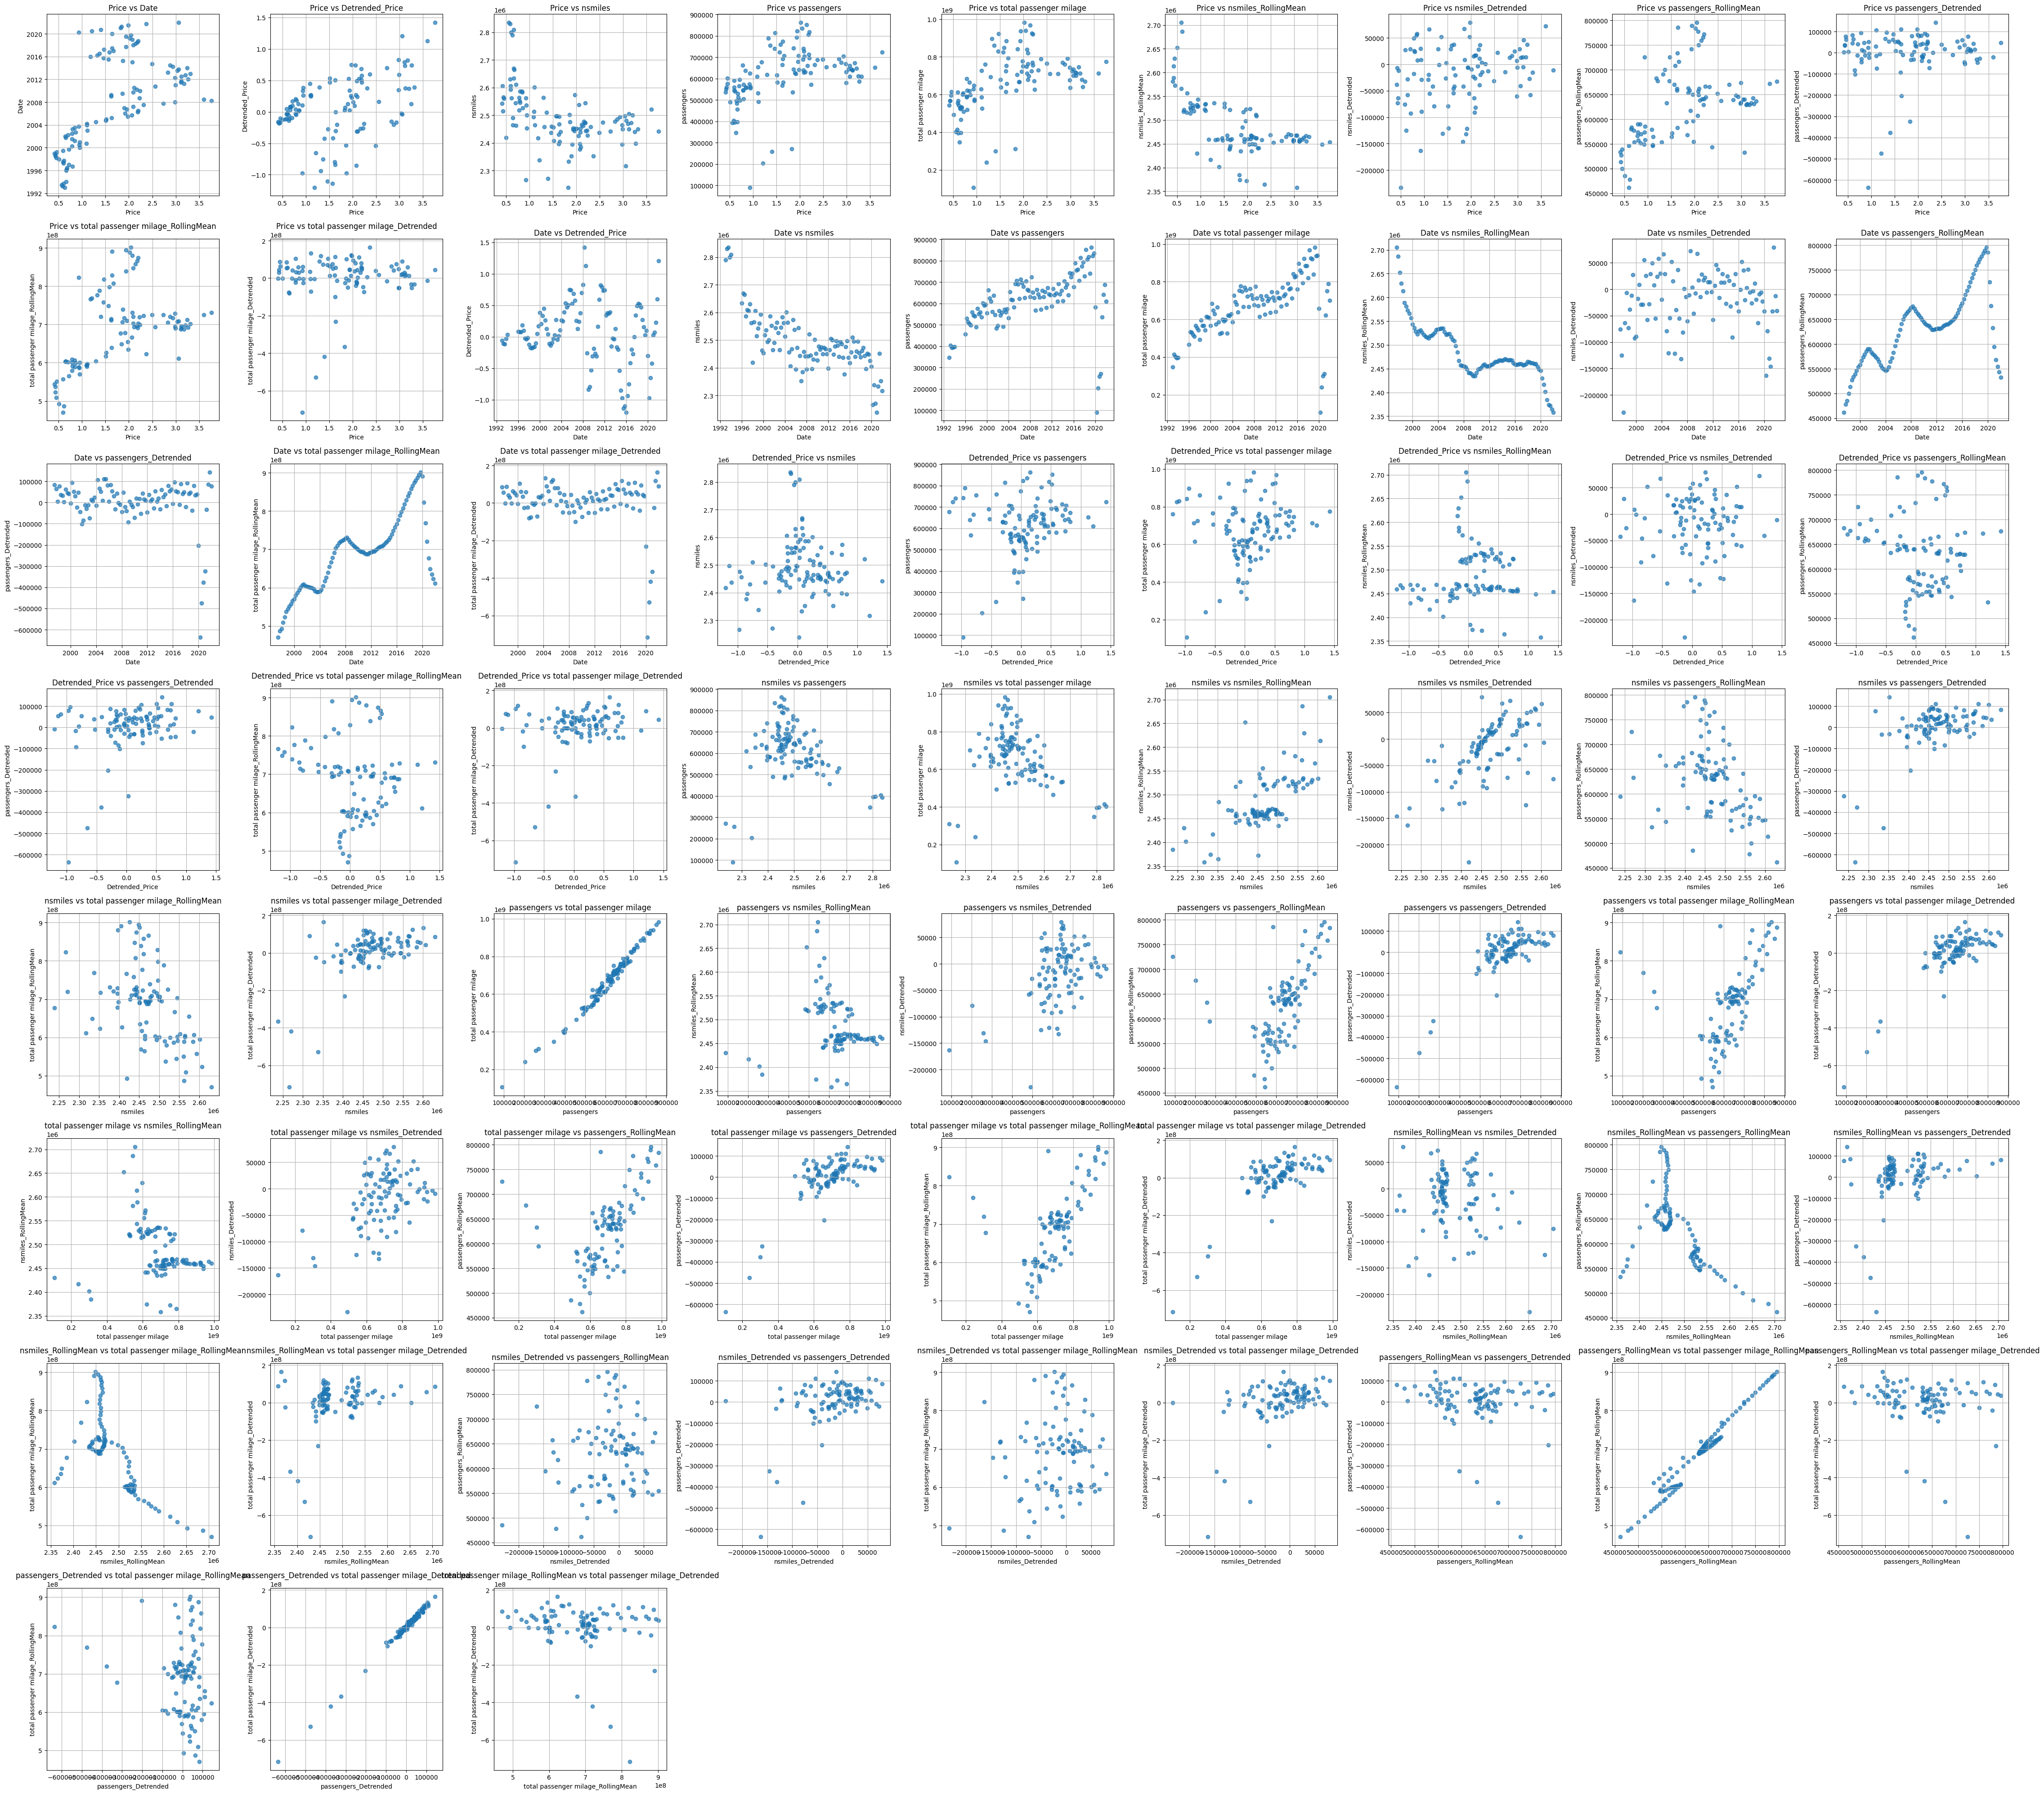

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_merged is your DataFrame
num_cols = df_merged.drop(columns=['Year', 'quarter', 'TimePeriod'])
num_cols_pairs = num_cols.columns

# Create all combinations of column pairs for visualization
subset_pairs = [(num_cols_pairs[i], num_cols_pairs[j]) 
                for i in range(len(num_cols_pairs)) 
                for j in range(i + 1, len(num_cols_pairs))]

# Number of pairs to plot
num_pairs = len(subset_pairs)

# Determine the number of rows and columns for subplots based on the number of pairs
nrows = int(num_pairs ** 0.5)
ncols = (num_pairs // nrows) + (num_pairs % nrows > 0)

# Create a figure for the scatter plots
plt.figure(figsize=(ncols * 5, nrows * 5))

# Plot all scatter plots for each pair of columns
for index, (col1, col2) in enumerate(subset_pairs):
    plt.subplot(nrows, ncols, index + 1)
    plt.scatter(df_merged[col1], df_merged[col2], alpha=0.7)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col1} vs {col2}')
    plt.grid(True)

plt.tight_layout()
plt.show()

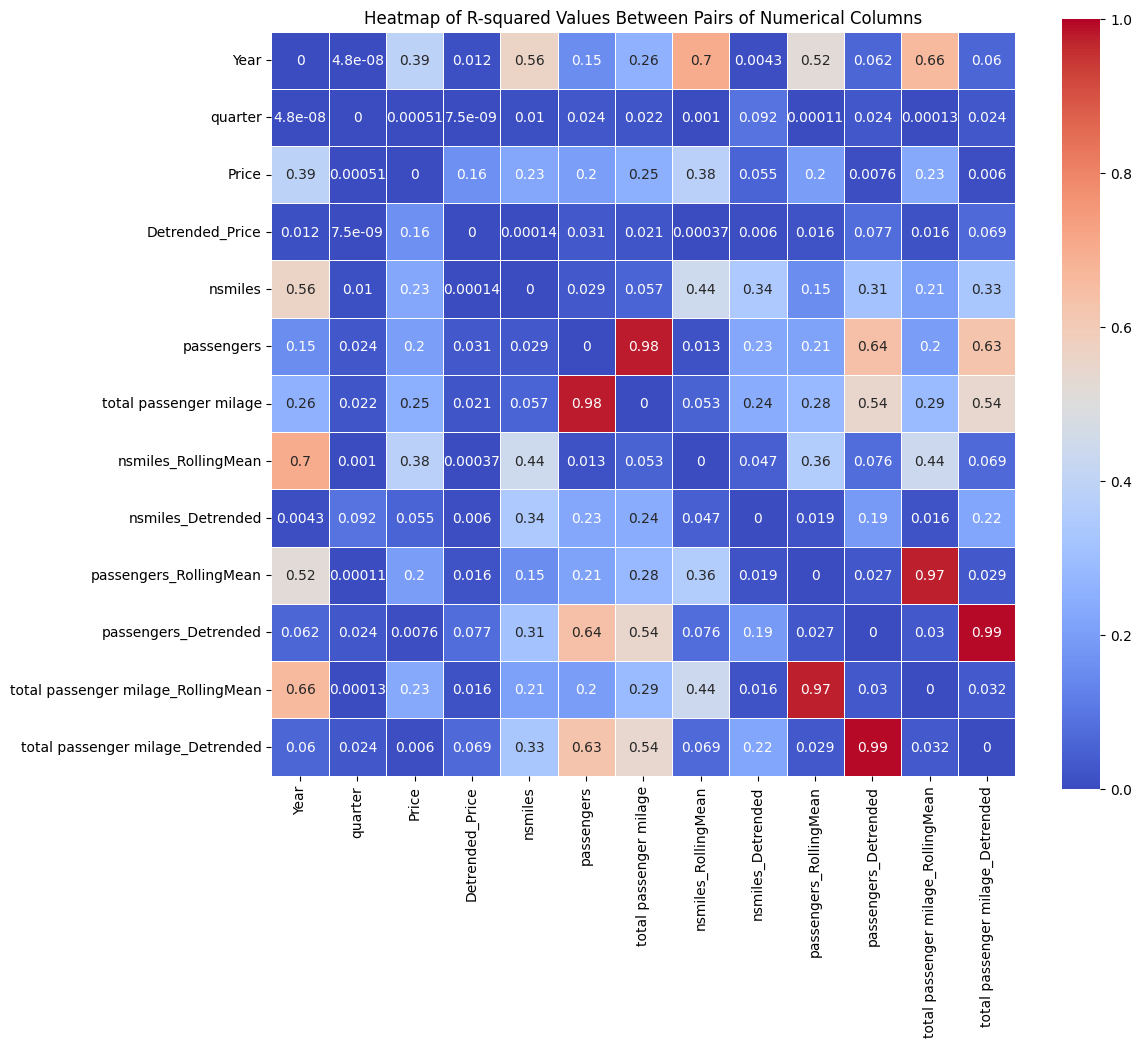

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming df_merged is your DataFrame
# Select only numerical columns
num_cols = df_merged.select_dtypes(include=[np.number]).columns

# Create a DataFrame to store the R-squared values
r2_scores = pd.DataFrame(index=num_cols, columns=num_cols)

# Iterate over all combinations of pairs
for i in range(len(num_cols)):
    for j in range(i + 1, len(num_cols)):
        col1 = num_cols[i]
        col2 = num_cols[j]
        
        # Prepare the data, drop NaNs resulting from the rolling mean
        df_temp = df_merged[[col1, col2]].dropna()
        X = df_temp[[col1]].values.reshape(-1, 1)
        Y = df_temp[[col2]].values.reshape(-1, 1)
        
        # Train the linear regression model
        model = LinearRegression()
        model.fit(X, Y)
        
        # Predict and calculate R-squared value
        Y_pred = model.predict(X)
        r2 = r2_score(Y, Y_pred)
        
        # Store the R-squared value in both (i, j) and (j, i) positions
        r2_scores.loc[col1, col2] = r2
        r2_scores.loc[col2, col1] = r2

# Convert the DataFrame to numeric (to handle NaN values) and fill NaNs with 0
r2_scores = r2_scores.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot the heatmap of R-squared values
plt.figure(figsize=(12, 10))
sns.heatmap(r2_scores, annot=True, cmap="coolwarm", vmin=0, vmax=1, square=True, linewidths=0.5)
plt.title('Heatmap of R-squared Values Between Pairs of Numerical Columns')
plt.show()

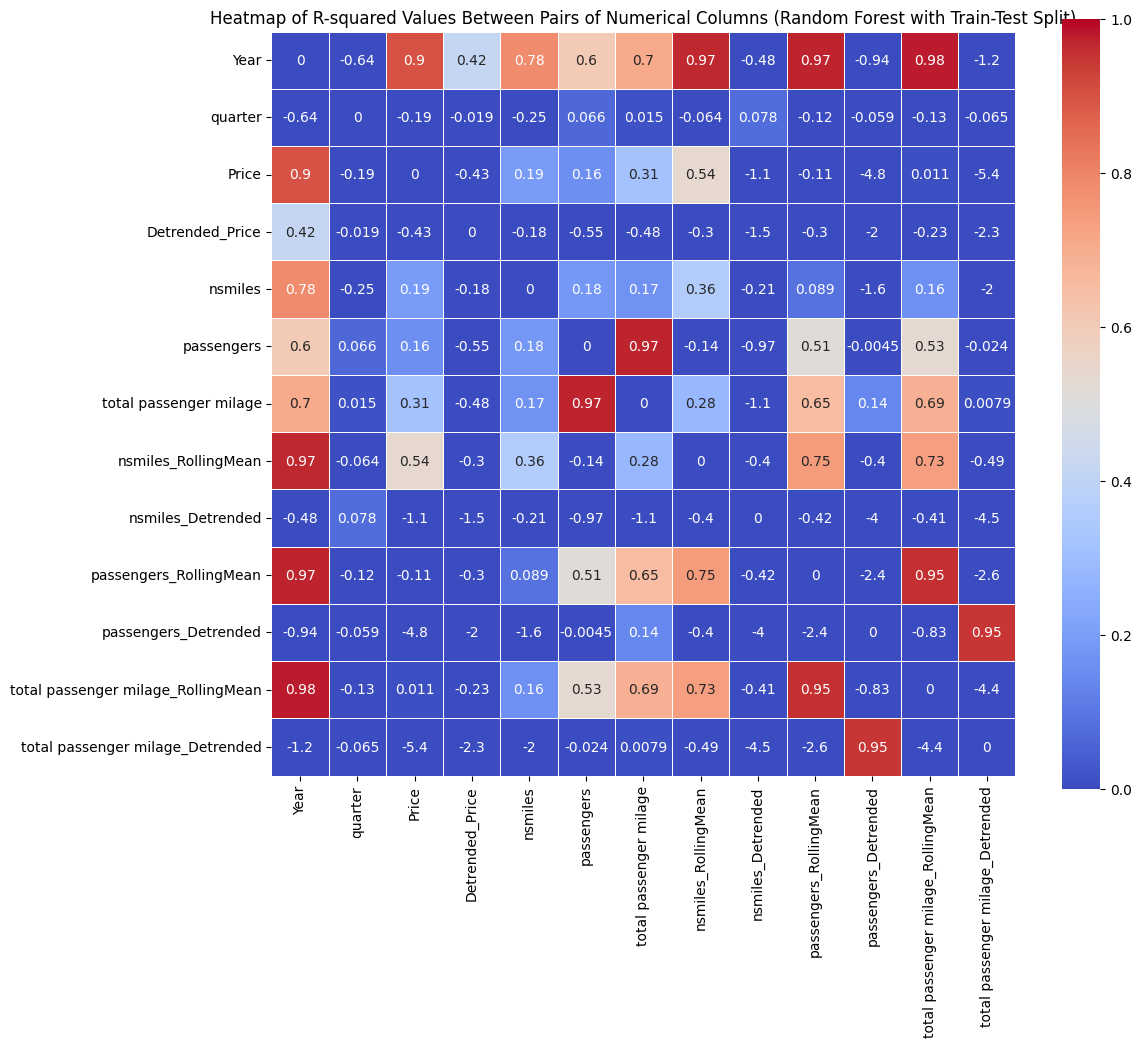

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assuming df_merged is your DataFrame
# Select only numerical columns
num_cols = df_merged.select_dtypes(include=[np.number]).columns

# Create a DataFrame to store the R-squared values
r2_scores = pd.DataFrame(index=num_cols, columns=num_cols)

# Iterate over all combinations of pairs
for i in range(len(num_cols)):
    for j in range(i + 1, len(num_cols)):
        col1 = num_cols[i]
        col2 = num_cols[j]
        
        # Prepare the data and drop NaNs
        df_temp = df_merged[[col1, col2]].dropna()
        X = df_temp[[col1]].values.reshape(-1, 1)
        Y = df_temp[[col2]].values.reshape(-1, 1)
        
        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
        
        # Train the Random Forest Regressor
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, Y_train.ravel())  # Flatten Y_train to 1D array
        
        # Predict on the test set and calculate R-squared value
        Y_pred = model.predict(X_test)
        r2 = r2_score(Y_test, Y_pred)
        
        # Store the R-squared value in both (i, j) and (j, i) positions
        r2_scores.loc[col1, col2] = r2
        r2_scores.loc[col2, col1] = r2

# Convert the DataFrame to numeric (to handle NaN values) and fill NaNs with 0
r2_scores = r2_scores.apply(pd.to_numeric, errors='coerce').fillna(0)

# Plot the heatmap of R-squared values
plt.figure(figsize=(12, 10))
sns.heatmap(r2_scores, annot=True, cmap="coolwarm", vmin=0, vmax=1, square=True, linewidths=0.5)
plt.title('Heatmap of R-squared Values Between Pairs of Numerical Columns (Random Forest with Train-Test Split)')
plt.show()